In [1]:
import numpy, bspline
from matplotlib import pyplot, colors, rcParams

%matplotlib nbagg

In [2]:
import importlib; importlib.reload(bspline)

<module 'bspline' from '/home/josecper/Programs/python/bspline.py'>

In [3]:
data=numpy.fromfile("../data/inclination_database_iberia.dat", sep=" ")

In [4]:
t=data[0::4]; inc=data[2::4]; k=numpy.arange(t[0],t[-1],100); err=data[3::4]; terr=data[1::4]

In [6]:
spl=bspline.solve(t,inc,k,l=10)

In [15]:
tfine=numpy.linspace(t[0],t[-1],2000); y=bspline.spline_rep(tfine,spl,k)

<IPython.core.display.Javascript object>


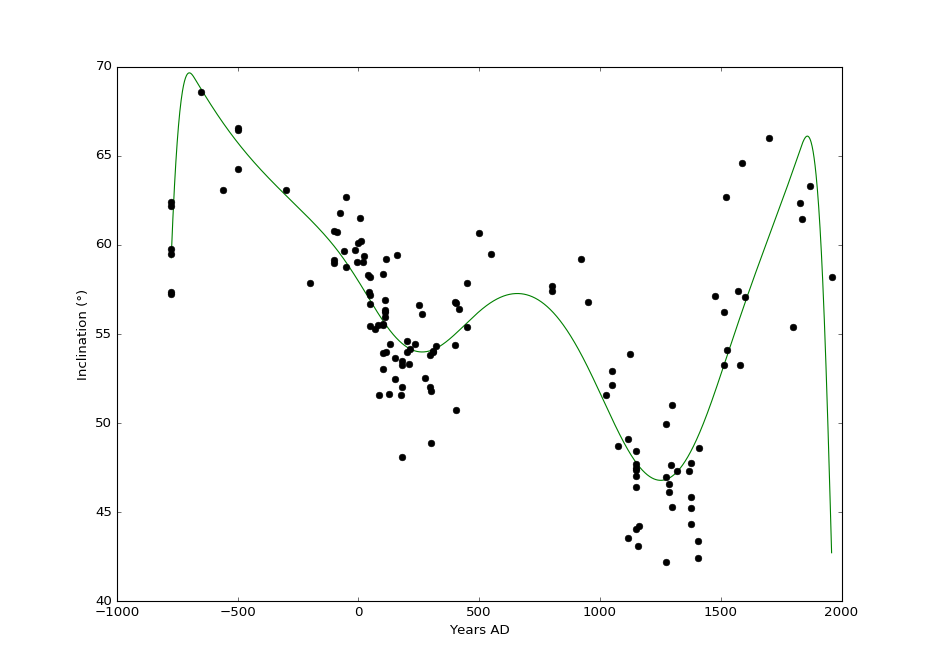

In [8]:
pyplot.plot(tfine,y,"g",t,inc,"ko")
pyplot.xlabel("Years AD")
pyplot.ylabel("Inclination (°)")
pyplot.show()

<IPython.core.display.Javascript object>


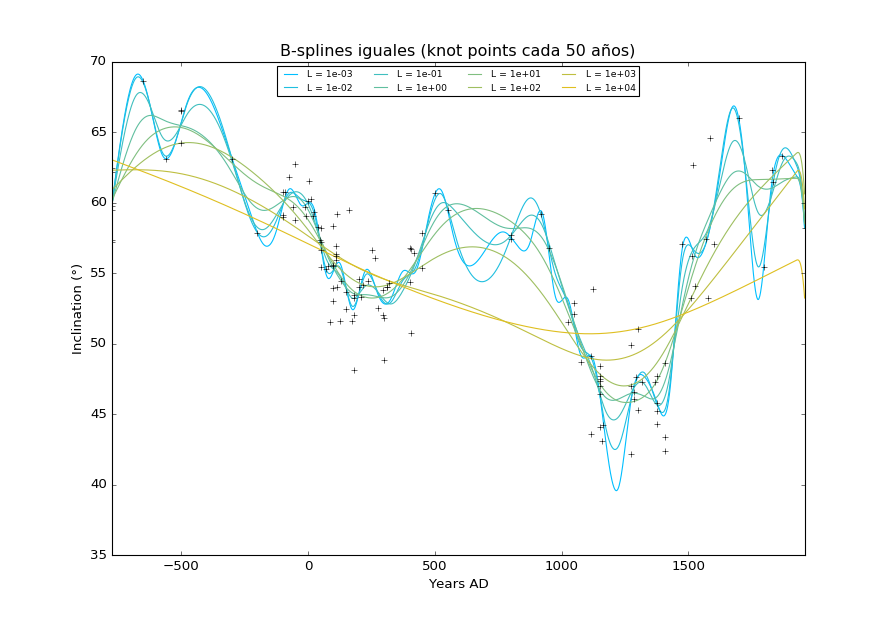

In [5]:
t=data[0::4]; inc=data[2::4]; k=numpy.arange(t[0]-50,t[-1]+50,50)
ls=[10**i for i in range(-3,5)]
nl=len(ls)
#ls=[10**0]
colors=[(i/nl,0.75,1-i/nl) for i in range(nl)]
tfine=numpy.linspace(t[0],t[-1],2000)

ys=[]
for l in ls:
    spl=bspline.solve(t,inc,k,l)
    #spl=numpy.ones_like(k)
    y=bspline.spline_rep(tfine,spl,k)
    ys.append(y)
    
fig, ax = pyplot.subplots()

for y, c, l in zip(ys,colors, ls):
    ax.plot(tfine,y,color=c,label="L = {0:1.0e}".format(l))

ax.plot(t,inc,"k+")
ax.set_axis_bgcolor("white")
ax.set_xbound(lower=tfine[0],upper=tfine[-1])
ax.set_title("B-splines iguales (knot points cada 50 años)")
pyplot.legend(loc="upper center", ncol=nl//2, fontsize="x-small")
pyplot.xlabel("Years AD")
pyplot.ylabel("Inclination (°)")
pyplot.show(fig)

<IPython.core.display.Javascript object>


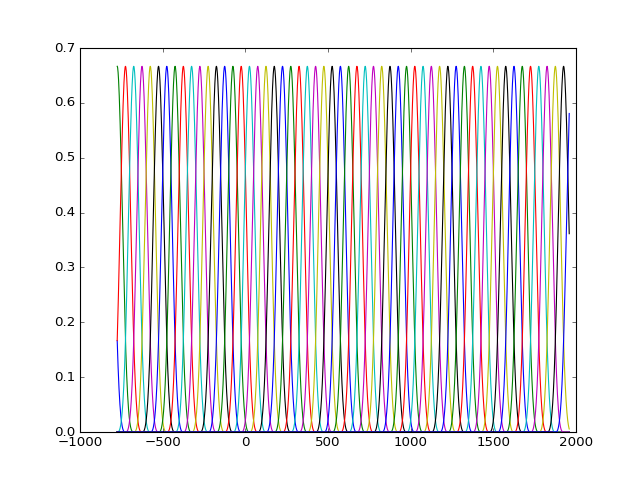

In [35]:
fig, ax = pyplot.subplots()
for spline in y.transpose():
    ax.plot(tfine,spline)
    
pyplot.show(fig)

<IPython.core.display.Javascript object>


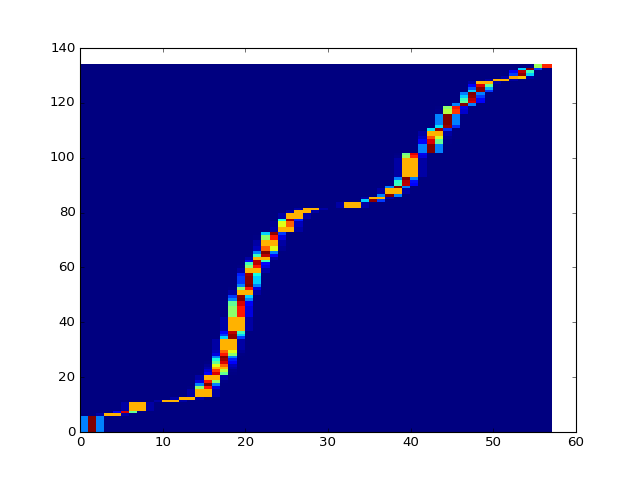

In [34]:
fig, ax = pyplot.subplots()
ax.pcolormesh(bspline.condition_array(k,t))

In [ ]:
pyplot.show()

In [28]:
n=30; (-2*numpy.eye(n)+numpy.eye(n+1)[1:,:-1]+numpy.eye(n+1)[:-1,1:])[:3,:]

array([[-2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.]])

In [29]:
d=(numpy.eye(n+2)-2*numpy.eye(n+3)[1:,:-1]+numpy.eye(n+4)[2:,:-2])

In [31]:
spl=bspline.solve(t,inc,k,10**3); pyplot.show(spl)

<IPython.core.display.Javascript object>


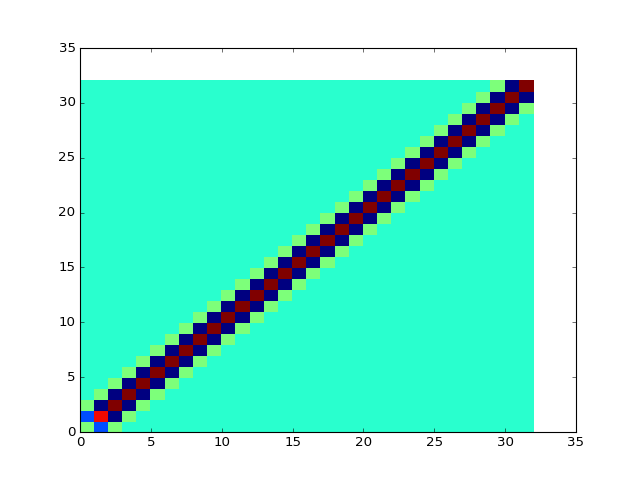

In [33]:
fig, ax = pyplot.subplots()
ax.pcolormesh(numpy.matmul(d.transpose(),d));pyplot.show()

In [ ]:
pyplot.pcolormesh(d);pyplot.show()

In [ ]:
d.shape

pruebas

In [36]:
times=numpy.linspace(-10,10,500)
x1=numpy.zeros_like(times); x1[times>0]=times[times > 0]**2;
x2=numpy.zeros_like(times); x2[times>1]=(times[times > 1]-1)**2;

<IPython.core.display.Javascript object>


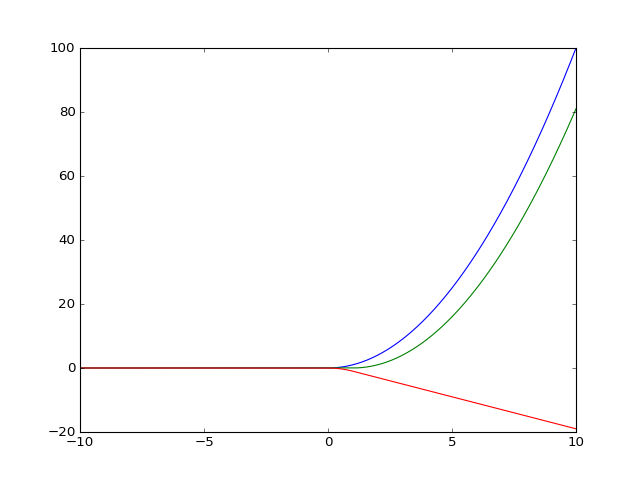

In [37]:
fig, ax = pyplot.subplots()
ax.plot(times,x1, times, x2, times, x2-x1); pyplot.show()

In [38]:
k=numpy.array((0,0,0,*tuple(numpy.linspace(0,5,8)),5,5,5))

In [39]:
t=numpy.linspace(0,5,4000)

In [40]:
d=1
k2=numpy.concatenate((numpy.repeat(k[0],d+1),k,numpy.repeat(k[-1],d+1)))
tgrid, kgrid = numpy.meshgrid(t,k2,indexing="ij")

In [41]:
yy=bspline.deboor_base(t,k,3)

In [ ]:
nsplines=yy.shape[1]
cols=[(0.25,i/(nsplines-1),1-i/(nsplines-1)) for i in range(nsplines)]
       
fig, ax = pyplot.subplots()
for spline, color in zip(yy.transpose(),cols):
    ax.plot(t[:-1],spline[:-1], color=color)
    
pyplot.show(fig)

splines de *de boor*

In [43]:
t=data[0::4]; inc=data[2::4]; err=data[3::4]

<IPython.core.display.Javascript object>


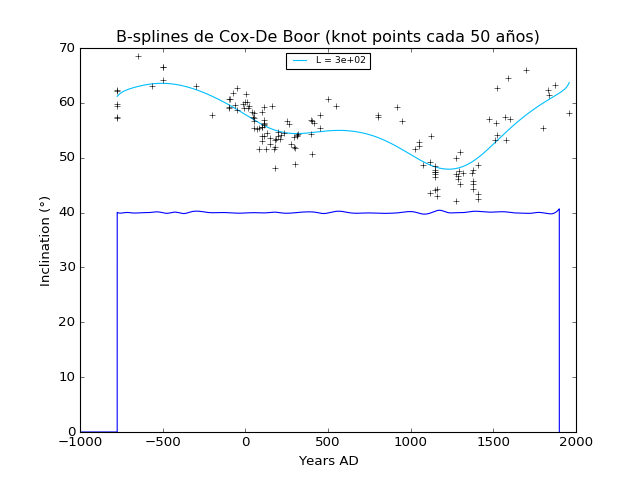

In [44]:
min_t = t[0]
max_t = t[-1]

k=numpy.array((min_t,min_t,min_t, *tuple(numpy.arange(min_t,max_t,50)),max_t,max_t,max_t))

#spline_coefs = bspline.solve(t,inc,k, l=1, spline_class="deboor", degree=3)

tfine=numpy.linspace(t[0],t[-1],4000)

#yy=bspline.deboor_base(k,tfine,3)*spline_coefs

fig, ax = pyplot.subplots()

#ls=[10**i for i in range(-3,5)]
ls=[260]
nsplines=len(ls)
#cols=colors.hsv_to_rgb([((i/(nsplines-1)) % 1.0,1.0,0.85) for i in range(nsplines)])
cols=[(i/nsplines,0.75,1-i/nsplines) for i in range(nsplines)]
       
#for spline, color in zip(yy.transpose(),cols):
#    ax.plot(tfine[:],spline[:], color="r", ls=":")

for l, col in zip(ls,cols):
    spl=bspline.solve(t,inc,k,l, spline_class="deboor", degree=3)
    #spl=numpy.ones_like(k)
    y=(bspline.deboor_base(k,tfine,3)*spl).sum(axis=1)
    ax.plot(tfine, y, color=col, label="L = {0:1.0e}".format(l))

#ax.plot(tfine[:], yy[:,-4])
    
#ax.plot(tfine[:],yy.sum(axis=1)[:], "k")
ax.plot(t,inc,"k+")
ax.set_xbound(lower=tfine[0],upper=tfine[-1])

ax.set_xlabel("Years AD")
ax.set_ylabel("Inclination (°)")
ax.set_title("B-splines de Cox-De Boor (knot points cada 50 años)")

pyplot.legend(loc="upper center", ncol=nsplines//2, fontsize="x-small")

pyplot.show(fig)

yes good

In [45]:
import numpy.random
t=numpy.sort(2900*numpy.random.rand(10000)-1000); inc=2*numpy.random.randn(t.shape[0])+40

In [46]:
spline_coefs, base=bspline.solve(t,inc,k,1, spline_class="deboor", degree=3, return_base=True)

In [47]:
base

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

<IPython.core.display.Javascript object>


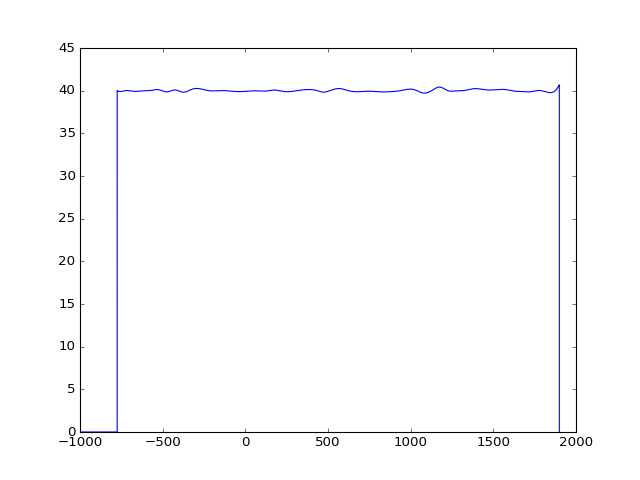

In [49]:
fig, ax = pyplot.subplots()
ax.plot(t,(base*spline_coefs).sum(axis=1)); pyplot.show()

In [50]:
ls = numpy.logspace(-10,10,2000)
rms = numpy.zeros_like(ls)
nrms = rms.copy()
ndata = inc.shape[0]

min_t = t[0]; max_t = t[-1]
k=numpy.array((min_t,min_t,min_t, *tuple(numpy.arange(min_t,max_t,50)),max_t,max_t,max_t))

base = bspline.deboor_base(k,t,3)

for i, l in enumerate(ls):
    spline_coefs = bspline.solve(t, inc, k, l, spline_class="deboor", base=base)
    model = (base * spline_coefs).sum(axis=1)
    
    rms[i] = numpy.sqrt(((model-inc)**2).sum()/ndata)
    nrms[i] = numpy.sqrt((((model-inc)/err)**2).sum()/ndata)
    
    

ValueError: operands could not be broadcast together with shapes (10000,) (134,) 

In [18]:
fig, ax = pyplot.subplots()

ax.semilogx(ls[:-1], numpy.diff(nrms,n=1), "k--", label="d(nRMS)/dl")
ax.semilogx(ls, nrms, "k", label="nRMS")
ax.semilogx(ls[:-1], numpy.diff(rms,n=1), "r--", label="d(RMS)/dl")
ax.semilogx(ls, rms, "r", label="RMS")
ax.semilogx([260.74,260.74],[7,-2], "g:")

ax.set_xlabel("Smoothing parameter")

pyplot.legend(loc="upper left" ,fontsize="small")
pyplot.show(fig)

In [6]:
nrms_trend=numpy.diff(nrms, n=1)

In [7]:
l_optimal=ls[:-1][nrms_trend == max(nrms_trend)]

*le boot stra pp pp pp p *

In [148]:
iterations = 1000
ndata = inc.shape[0]
l = 100
min_t = t[0]; max_t = t[-1]
k=numpy.array((min_t,min_t,min_t, *tuple(numpy.arange(min_t,max_t,50)),max_t,max_t,max_t))

cs = numpy.zeros((iterations, ndata))
ts = cs.copy()

err_temp = err
terr_temp = terr

s0, base = bspline.solve(t, inc, k, l, spline_class="deboor", return_base=True)
cs[0, :] = (base * s0).sum(axis=1)
ts[0, :] = t.copy()

for i in range(1,iterations):
    
    #c_rand = numpy.random.randn(ndata)*err+cs[i-1,:]
    c_rand = numpy.random.randn(ndata)*err+cs[0,:]
    ts[i,:] = numpy.random.randn(ndata)*terr+ts[i-1,:]
    #ts[i,:] = numpy.random.randn(ndata)*terr+ts[0,:]
    
    s = bspline.solve(ts[i,:], c_rand, k, l, spline_class="deboor")
    cs[i,:] = (base * s).sum(axis=1)
    #cs[i,:] = c_rand

In [149]:
fig, ax = pyplot.subplots()

for i in range(iterations):
    ax.plot(ts[i,:],cs[i,:], "m+")

ax.plot(ts[0, :], cs[0, :], "k-")
ax.plot()
ax.plot(t,inc, "ko")
    
pyplot.show(fig)

test

In [145]:
c = numpy.zeros(iterations)

In [146]:
for i in range(1,iterations):
    c[i]=c[i-1]+numpy.random.randn(1)

In [147]:
pyplot.plot(c);pyplot.show()

bootstrap 02

In [152]:
iterations = 1000
ndata = inc.shape[0]
l = 260
min_t = t[0]; max_t = t[-1]
k=numpy.array((min_t,min_t,min_t, *tuple(numpy.linspace(min_t,max_t,60)),max_t,max_t,max_t))

cs = numpy.zeros((iterations, ndata))
ts = cs.copy()

err_temp = err
terr_temp = terr

s0, base = bspline.solve(t, inc, k, l, spline_class="deboor", return_base=True)
cs[0, :] = (base * s0).sum(axis=1)
ts[0, :] = t.copy()


for i in range(1,iterations):
    
    #c_rand = numpy.random.randn(ndata)*err+cs[0,:] #what???
    c_rand = numpy.random.randn(ndata)*err+inc
    #ts[i,:] = numpy.random.randn(ndata)*terr+ts[0,:]
    ts[i,:] = numpy.random.randn(ndata)*terr+t
    
    #min_t = min(ts[i,:]); max_t = max(ts[i,:])
    #k=numpy.array((min_t,min_t,min_t, *tuple(numpy.linspace(min_t,max_t,60)),max_t,max_t,max_t))
    
    s = bspline.solve(ts[i,:], c_rand, k, l, spline_class="deboor", return_base=False)
    
    #recalculate spline at t
    cs[i,:] = (bspline.deboor_base(k,t,3) * s).sum(axis=1)
    
    #cs[i,:] = (base * s).sum(axis=1)

    
t_avg = ts.sum(axis=0)/iterations
c_avg = cs.sum(axis=0)/iterations

stdev = numpy.sqrt(((cs-c_avg)**2).sum(axis=0)/iterations)

In [208]:
fig, ax = pyplot.subplots()

for i in range(iterations):
    ax.plot(t,cs[i,:], color="#00C0B8", ls="-", linewidth=0.05)

ax.plot(t, cs[0, :], "m-")
ax.plot(t,inc, color="k", marker="o", markersize=2, ls=" ")
ax.plot(t,c_avg, "k-")

ax.plot(t,c_avg+2*stdev,"k--")
ax.plot(t,c_avg-2*stdev,"k--")
#ax.plot(t, c_final, "k-")

ax.set_xbound(t[0],t[-1])

pyplot.show(fig)

ValueError: x and y must have same first dimension

In [16]:
max(ts[124,:])

1959.0

In [28]:
stdev.shape

(134,)

In [79]:
pyplot.plot(t,t_avg-t);pyplot.show()

bootstrap 02 v 02

In [52]:
iterations = 1000
ndata = inc.shape[0]
l = 50

#min/max reasonable times
min_t = t[0]-3*terr[0]; max_t = t[-1]+3*terr[-1]
k=numpy.array((min_t,min_t,min_t, *tuple(numpy.linspace(min_t,max_t,60)),max_t,max_t,max_t))

##debug
#tfine=numpy.linspace(min_t,max_t,2000)
#cshd=numpy.zeros((iterations,len(tfine)))

##
cs = numpy.zeros((iterations, ndata))
ts = cs.copy()

err_temp = err
terr_temp = terr

s0, base = bspline.solve(t, inc, k, l, spline_class="deboor", return_base=True)
cs[0, :] = (base * s0).sum(axis=1)
ts[0, :] = t.copy()


for i in range(1,iterations):
    
    #c_rand = numpy.random.randn(ndata)*err+cs[0,:] #what???
    c_rand = numpy.random.randn(ndata)*err+inc
    #ts[i,:] = numpy.random.randn(ndata)*terr+ts[0,:]
    ts[i,:] = numpy.clip(numpy.random.randn(ndata)*terr+t,min_t,max_t)
    
    #min_t = min(ts[i,:]); max_t = max(ts[i,:])
    #k=numpy.array((min_t,min_t,min_t, *tuple(numpy.linspace(min_t,max_t,60)),max_t,max_t,max_t))
    
    s = bspline.solve(ts[i,:], c_rand, k, l, spline_class="deboor", base=base)
    
    #debug: recalculate spline at tfine
    #cshd[i,:] = (bspline.deboor_base(k,tfine,3) * s).sum(axis=1)
    
    cs[i,:] = (base * s).sum(axis=1)

    
t_avg = ts.sum(axis=0)/iterations
c_avg = cs.sum(axis=0)/iterations

stdev = numpy.sqrt(((cs-c_avg)**2).sum(axis=0)/iterations)

In [30]:
min_t = t[0]-150; max_t = t[-1]+150
#min_t = t[0]; max_t = t[-1]
k=numpy.array((min_t,min_t,min_t, *tuple(numpy.arange(min_t,max_t,25)),max_t,max_t,max_t)) #what the honk
tfine = numpy.linspace(k[0],k[-1],2000)
iterations=1000

In [205]:
c_slow, stdev_slow = bspline.bootstrap_fit(t,inc,terr,err,tfine,knot_points=k, iterations=iterations)

In [33]:
c_fast, stdev_fast, cs = bspline.bootstrap_fast(t,inc,terr,err,tfine,
                                            knot_points=k, l=260, iterations=iterations,
                                            randomness=("normal","normal"), return_all=True)
c_fast_u, stdev_fast_u = bspline.bootstrap_fast(t,inc,terr,err,tfine,
                                            knot_points=k, l=260, iterations=iterations,
                                            randomness=("uniform","normal"))

In [36]:
t_zeros, c_zeros, err_zeros, terr_zeros = t[terr == 0], inc[terr == 0], err[terr == 0], terr[terr == 0]

fig, ax = pyplot.subplots()

ax.plot(tfine,c_fast, "r-",
        tfine,c_fast+2*stdev_fast, "r--",
        tfine,c_fast-2*stdev_fast, "r--")
ax.plot(tfine,c_fast_u, "m-",
        tfine,c_fast_u+2*stdev_fast_u, "m--",
        tfine,c_fast_u-2*stdev_fast_u, "m--")
#ax.plot(tfine,c_slow, "k-",
#        tfine,c_slow+2*stdev_slow, "k--",
#        tfine,c_slow-2*stdev_slow, "k--")
for kp in k:
    ax.plot((kp,kp), (75,35), "g:", linewidth=0.5)
ax.errorbar(t,inc,err,terr, ls=" ", color="#00C0BA", marker="s",
               markeredgewidth=0,elinewidth=0.4, ecolor="#707070")
ax.errorbar(t_zeros, c_zeros, err_zeros, terr_zeros,
            marker="s", markeredgewidth=0, markersize=5, color="#00504A", ls=" ", ecolor="#00504A")

ax.set_xbound(t[0], t[-1])
ax.set_ybound(40,70)
ax.set_xlabel("Years AD")
ax.set_ylabel("Inclination (°)")
pyplot.show(fig)

In [213]:
fig, ax = pyplot.subplots()

for i in range(iterations):
    ax.plot(tfine,cs[i,:], color="#00C0B8", ls="-", linewidth=0.05)

ax.plot(tfine, cs[0, :], "m-")
ax.plot(t, inc, color="k", marker="o", markersize=2, ls=" ")
ax.plot(tfine, c_fast, "k-")

ax.plot(tfine,c_fast+2*stdev_fast,"k--")
ax.plot(tfine,c_fast-2*stdev_fast,"k--")
#ax.plot(t, c_final, "k-")

ax.set_xbound(t[0],t[-1])

pyplot.show(fig)